In [104]:
import astrodendro

In [107]:
astrodendro.Dendrogram?

Init signature: astrodendro.Dendrogram()
Docstring:     
This class is used to compute and represent a dendrogram for a given dataset.

To create a dendrogram from an array, use the
:meth:`~astrodendro.dendrogram.Dendrogram.compute` class method::

    >>> from astrodendro import Dendrogram
    >>> d = Dendrogram.compute(array)

Once the dendrogram has been computed, you can explore it programmatically
using the ``trunk`` attribute, which allows you to access the base-level
structures in the dendrogram::

    >>> d.trunk
    [<Structure type=leaf idx=101>,
     <Structure type=branch idx=2152>,
     <Structure type=leaf idx=733>,
     <Structure type=branch idx=303>]

Structures can then be recursively explored. For more information on
attributes and methods available for structures, see the
:class:`~astrodendro.structure.Structure` class.

The dendrogram can also be explored using an interactive viewer. To use
this, use the :meth:`~astrodendro.dendrogram.Dendrogram.viewer` method::

 

In [120]:
blah = astrodendro.Dendrogram.compute(img[:,6250:8250,6250:8250][0].value, min_value=0.0005, min_delta=0.0001)

In [129]:
blah.trunk

[<Structure type=leaf idx=0>,
 <Structure type=leaf idx=1>,
 <Structure type=branch idx=2>,
 <Structure type=leaf idx=10>,
 <Structure type=branch idx=4>,
 <Structure type=leaf idx=13>,
 <Structure type=leaf idx=16>,
 <Structure type=leaf idx=15>,
 <Structure type=branch idx=14>,
 <Structure type=leaf idx=25>,
 <Structure type=leaf idx=26>,
 <Structure type=leaf idx=27>,
 <Structure type=leaf idx=28>,
 <Structure type=leaf idx=29>,
 <Structure type=leaf idx=30>,
 <Structure type=leaf idx=31>,
 <Structure type=leaf idx=32>,
 <Structure type=leaf idx=33>,
 <Structure type=leaf idx=61>,
 <Structure type=leaf idx=84>,
 <Structure type=leaf idx=85>,
 <Structure type=branch idx=34>]

In [117]:
x.get_mask()

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

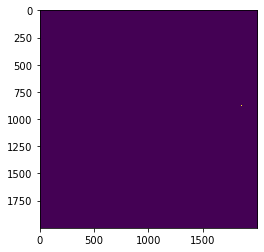

In [127]:
pl.imshow(x.get_mask())

log-based asinh range=(-0.14938273016081763, 1.5602677529023028), vmin=0.7089527147020178, vmax=36.330197006464005
old ticks: <a list of 7 Text yticklabel objects>, new ticks: ['0.71', '1.1', '1.7', '2.6', '4.1', '6.3', '9.8', '15', '23', '36']


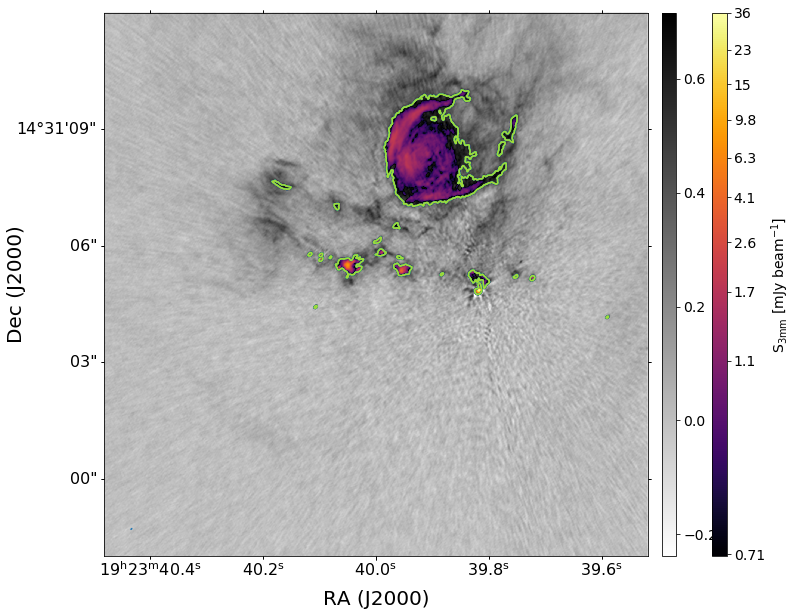

In [131]:
fig = pl.figure(figsize=(10,10))
quicklook(img[:,6250:8250,6250:8250], fig=fig)
ax = fig.axes[0]
for x in blah.trunk:
    ax.contour(x.get_mask(), )# transform=ax.get_transform('world'))

In [145]:
cat = astrodendro.pp_catalog(blah,metadata={'data_unit':u.Jy,
                                            'wcs': img[:,6250:8250,6250:8250][0].wcs})

Computing catalog for 92 structures

[>                                        ] 1%
[>                                        ] 2%
[=>                                       ] 3%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 6%
[===>                                     ] 7%
[===>                                     ] 8%
[===>                                     ] 9%
[====>                                    ] 10%
[====>                                    ] 11%
[=====>                                   ] 13%
[=====>                                   ] 14%
[======>                                  ] 15%
[======>                                  ] 16%
[======>                                  ] 17%
[=======>                                 ] 18%
[=======>                                 ] 19%
[========>                                ] 20%
[========>                                ] 21%
[=========> 

In [158]:
img.wcs.celestial.wcs.radesys

'ICRS'

In [ ]:
#from astropy.wcs import WCS
#WCS(fits.getheader('blah.fits'))

In [135]:
import regions

In [139]:
!cat /orange/adamginsburg/w51/W51_ALMA_2013.1.00308.S/regions/exclusion_zone_test_june3_2021

#CRTFv0 CASA Region Text Format version 0
poly [[290.91590569deg, 14.52070716deg], [290.91680246deg, 14.52010677deg], [290.91746456deg, 14.51917373deg], [290.91784171deg, 14.51858957deg], [290.91766570deg, 14.51793239deg], [290.91717123deg, 14.51841108deg], [290.91686113deg, 14.51844353deg], [290.91633313deg, 14.51839485deg], [290.91580512deg, 14.51833806deg], [290.91523522deg, 14.51832994deg], [290.91490835deg, 14.51971733deg], [290.91554530deg, 14.52069905deg]] coord=ICRS, corr=[I], linewidth=2, linestyle=-, symsize=1, symthick=1, color=2ee6d6, font=Helvetica, fontsize=10, fontstyle=bold, usetex=false


In [142]:
exclusion_region = regions.read_ds9('/orange/adamginsburg/w51/W51_ALMA_2013.1.00308.S/regions/exclusion_zone_test_june3_2021.reg')

In [143]:
exclusion_region

[<PolygonSkyRegion(vertices=<SkyCoord (ICRS): (ra, dec) in deg
     [(290.915906, 14.520707), (290.916802, 14.520107),
      (290.917465, 14.519174), (290.917842, 14.51859 ),
      (290.917666, 14.517932), (290.917171, 14.518411),
      (290.916861, 14.518444), (290.916333, 14.518395),
      (290.915805, 14.518338), (290.915235, 14.51833 ),
      (290.914908, 14.519717), (290.915545, 14.520699)]>)>]

In [152]:
from astropy import coordinates
from astropy import units as u

In [162]:
coords = coordinates.SkyCoord(cat['x_cen'], cat['y_cen'], unit=(u.deg,u.deg), frame=img.wcs.celestial.wcs.radesys.lower())
coords

<SkyCoord (ICRS): (ra, dec) in deg
    [(290.91495719, 14.5178207 ), (290.91711273, 14.51789412),
     (290.91590741, 14.51800983), (290.91590741, 14.51800877),
     (290.91591123, 14.51810202), (290.91586692, 14.51808175),
     (290.91586171, 14.51806371), (290.91590329, 14.51804839),
     (290.91594765, 14.51811816), (290.91594867, 14.51808983),
     (290.91551075, 14.51810018), (290.91587689, 14.51810388),
     (290.91595352, 14.51812622), (290.9156342 , 14.51811126),
     (290.91686557, 14.51819027), (290.91647112, 14.51816005),
     (290.91618005, 14.51812753), (290.91687286, 14.51819071),
     (290.91687118, 14.51819067), (290.91687235, 14.51819012),
     (290.91679731, 14.51816112), (290.9168762 , 14.51818908),
     (290.91693699, 14.5181758 ), (290.91683939, 14.51821209),
     (290.91680169, 14.51821633), (290.91707372, 14.51823474),
     (290.91649334, 14.51824844), (290.91700328, 14.5182489 ),
     (290.91707319, 14.51826564), (290.91715399, 14.51827052),
     (290.91662867, 

In [146]:
cat

_idx,area_ellipse,area_exact,flux,major_sigma,minor_sigma,position_angle,radius,x_cen,y_cen
,pix2,pix2,Jy,pix,pix,deg,pix,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,16.384987274361652,52.0,0.03425751667236909,2.506491257086574,1.501004446182875,-139.38716889878972,1.9396531961166283,290.9149571893199,14.51782069506418
1,22.16059454380088,78.0,0.06934452807763591,2.8525323027609355,1.7838276896629326,-136.7605541835891,2.2557539997355485,290.9171127279266,14.517894115399715
2,104.53838474879316,697.0,4.6587873580283485,5.80406606113108,4.135666432201507,66.00066435086701,4.899355179949687,290.9159074141787,14.518009830983344
3,79.77308263827982,461.0,4.47306550166104,4.903630798538561,3.735430623925514,46.6246737377917,4.279856615972697,290.9159074067699,14.518008765071995
4,981.7632023406289,2224.0,1.5587033536867239,23.60482500157572,9.55010242630402,151.06988899257274,15.014276423458776,290.91591123307285,14.518102015879746
5,338.1210315412553,785.0,0.5908328460063785,12.642493010984676,6.141034360813035,112.4443108680011,8.811241909447018,290.91586692493814,14.518081752158986
6,68.52751455600584,189.0,0.17547577334335074,8.010179765085047,1.9643767363430715,81.21094096489321,3.9667380534211074,290.9158617088273,14.518063709248253
7,5.626512071731646,17.0,0.018813500879332423,1.7509541003234308,0.7378474110111659,101.08599290637144,1.1366340438870501,290.9159032935571,14.518048394879786


In [165]:
excluded = exclusion_region[0].contains(coords, img[:,6250:8250,6250:8250][0].wcs)
excluded

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [166]:
cat[~excluded]

_idx,area_ellipse,area_exact,flux,major_sigma,minor_sigma,position_angle,radius,x_cen,y_cen
,pix2,pix2,Jy,pix,pix,deg,pix,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,16.384987274361652,52.0,0.03425751667236909,2.506491257086574,1.501004446182875,-139.38716889878972,1.9396531961166283,290.9149571893199,14.51782069506418
1,22.16059454380088,78.0,0.06934452807763591,2.8525323027609355,1.7838276896629326,-136.7605541835891,2.2557539997355485,290.9171127279266,14.517894115399715
2,104.53838474879316,697.0,4.6587873580283485,5.80406606113108,4.135666432201507,66.00066435086701,4.899355179949687,290.9159074141787,14.518009830983344
3,79.77308263827982,461.0,4.47306550166104,4.903630798538561,3.735430623925514,46.6246737377917,4.279856615972697,290.9159074067699,14.518008765071995
4,981.7632023406289,2224.0,1.5587033536867239,23.60482500157572,9.55010242630402,151.06988899257274,15.014276423458776,290.91591123307285,14.518102015879746
5,338.1210315412553,785.0,0.5908328460063785,12.642493010984676,6.141034360813035,112.4443108680011,8.811241909447018,290.91586692493814,14.518081752158986
6,68.52751455600584,189.0,0.17547577334335074,8.010179765085047,1.9643767363430715,81.21094096489321,3.9667380534211074,290.9158617088273,14.518063709248253
7,5.626512071731646,17.0,0.018813500879332423,1.7509541003234308,0.7378474110111659,101.08599290637144,1.1366340438870501,290.9159032935571,14.518048394879786


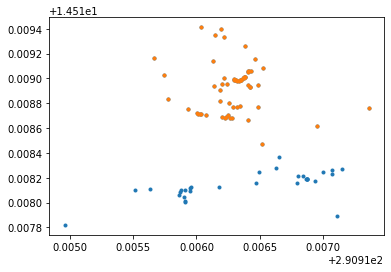

In [168]:
pl.plot(coords.ra, coords.dec, '.')
pl.plot(coords.ra[excluded], coords.dec[excluded], '.')